In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('data/android-games.csv')

In [53]:
tens = dict(k=1e3, m=1e6, b=1e9)
factor = [float(i.split()[0]) for i in df.installs[:]]
exp = [tens[i.split()[1].lower()] for i in df.installs[:]]
ans = [int(f * e) for f, e in zip(factor, exp)]
df["installs Number"] = ans

df

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,installs Number
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False,100000000
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False,100000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False,1000000
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False,1000000
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False,5000000
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False,1000000


missing value, Dtype

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
 15  installs Number   1730 non-null   int64  
dtypes: bool(1), float64(4), int64(8), object(3

In [55]:
df[["title","average rating", "installs"]].sort_values(by="average rating", ascending=False)

,title,average rating,installs
741,超級單字王 - 英檢、多益、托福 輕鬆學,4.91,500.0 k
956,Indy Cat for VK,4.87,5.0 M
813,Английский для Начинающих: LinDuo HD,4.82,1.0 M
575,Free Slot Machines with Bonus Games!,4.82,5.0 M
1658,Word Collect - Free Word Games,4.82,10.0 M
...,...,...,...
1592,NEW QuizDuel!,3.21,1.0 M
1606,TopQuiz -Play Quiz & Lottery | Win Money via P...,3.20,1.0 M
304,모두의마블,3.16,10.0 M
1590,스케치퀴즈,3.13,5.0 M


/Users/lckyn/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


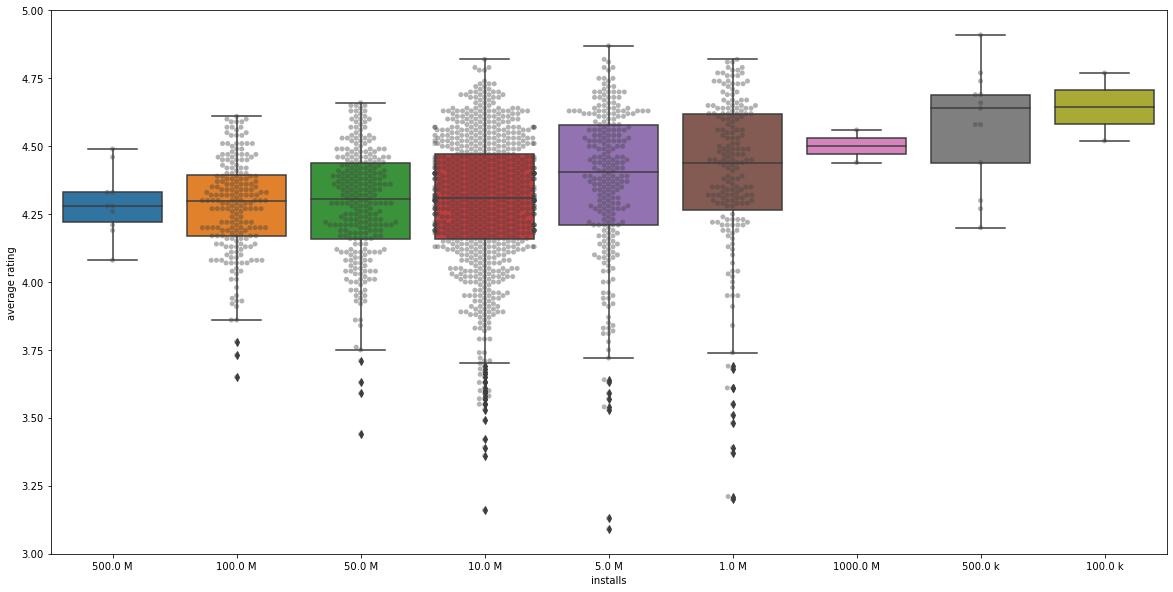

In [79]:
plt.figure(figsize= (20, 10))

g = sns.boxplot(data=df, x="installs", y="average rating")
g = sns.swarmplot(data=df, x="installs", y="average rating", color=".25", alpha = 0.4)

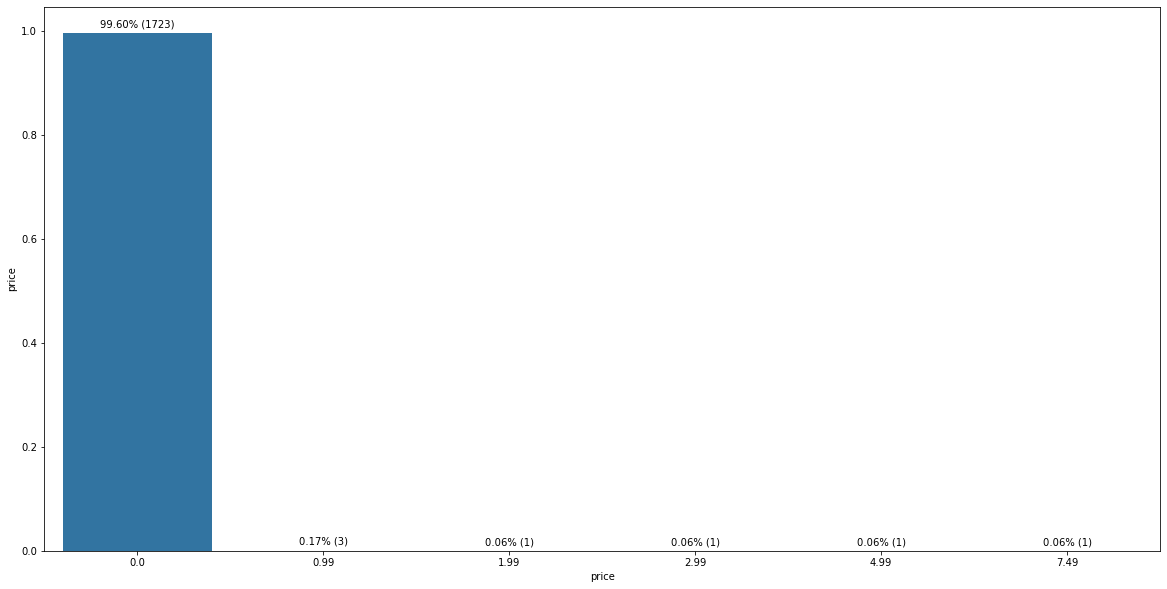

In [174]:
plt.figure(figsize= (20, 10))
countPrice = df["price"].value_counts()
percentPrice = countPrice / sum(df["price"].value_counts())
g = sns.barplot(data=df, x="price", y=percentPrice)

for (index, row), c in zip(enumerate(percentPrice),countPrice):
    g.text(index ,row  + 0.01, "{p:.2%} ({c})".format(p=row, c=c), color='black', ha="center")

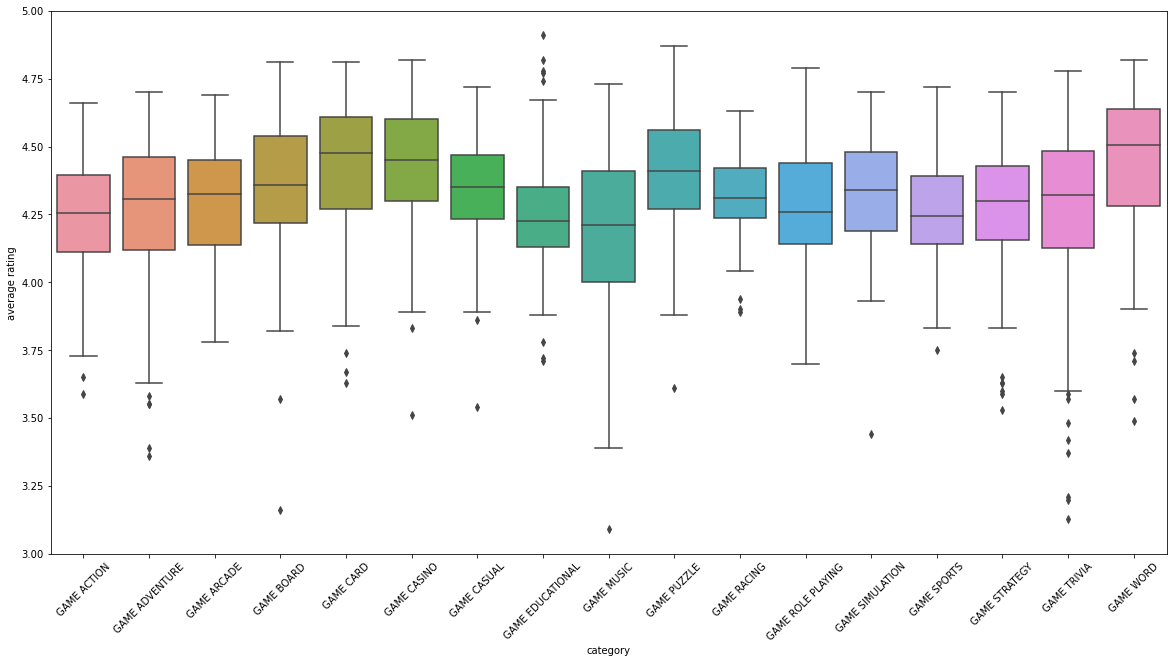

In [199]:
plt.figure(figsize= (20, 10))
plt.xticks(rotation=45)

g = sns.boxplot(data=df, x="category", y="average rating")

In [212]:
col = ["title", "total ratings", "5 star ratings", "4 star ratings", "3 star ratings", "2 star ratings", "1 star ratings"]
col_r = ["5 star ratings", "4 star ratings", "3 star ratings", "2 star ratings", "1 star ratings"]
temp = df[col]


,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,61935712,4478738,2795172,1814999,9654037
1,26670566,2109631,1352610,893674,4945478
2,17850942,1796761,1066095,725429,4397640
3,12493668,1474319,741410,383478,2088781
4,9657878,2124544,1034025,375159,1045945
...,...,...,...,...,...
1725,96954,17233,5098,1249,2309
1726,74010,21546,10648,4710,9560
1727,84688,16783,6619,1867,4892
1728,99168,3528,3258,1059,3278


In [235]:
temp.loc[:, col_r] / 


ValueError: Unable to coerce to Series, length must be 5: given 1730

In [238]:
temp.loc[:, "total ratings"].values.shape

(1730,)